# Mashhad Housing Market Price Analysis

> This notebook performs exploratory data analysis (EDA), preprocessing, feature engineering,
and baseline modeling on Mashhad apartment sale listings. The aim is to understand price drivers
and to build baseline regression models to predict apartment sale prices.

## Importing Essential Libraries

In this first step, we import the necessary Python libraries for our analysis.

* **pandas**: Used for data manipulation and analysis, particularly for creating and working with DataFrames.
* **numpy**: Provides support for large, multi-dimensional arrays and matrices, along with a collection of mathematical functions.
* **matplotlib.pyplot**: A plotting library for creating static, animated, and interactive visualizations.
* **seaborn**: A data visualization library based on matplotlib that provides a high-level interface for drawing attractive and informative statistical graphics.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/mashhad-apartment-sales-data/mashhad_apartment_sales_2025.csv
/kaggle/input/mashhad-apartment-sales-data/mashhad_apartment_sales_2024.csv


## Loading the Dataset & Analysis

Here, we load our dataset into a pandas DataFrame. The data is stored in a CSV file named **`mashhad_apartment_sales_2025.csv`**. We then display the first five rows of the DataFrame using the `head()` method to get an initial look at the data structure and its columns.

Please load the latest version of dataset that exist in [dataset page](https://www.kaggle.com/code/adelzare/mashhad-housing-market-prices-analysis)

In [2]:
df = pd.read_csv("/kaggle/input/mashhad-apartment-sales-data/mashhad_apartment_sales_2025.csv")

df = pd.DataFrame(df)

# display the dataset
display(df.head())

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,neighborhood,area,construction_year,rooms_count,floor,total_floors_count,unit_per_floor,has_elevator,has_parking,has_warehouse,Price(Toman),Price(USD),created_at_date,created_at_shamsi
0,emamreza,115.0,1403.0,2.0,4.0,6.0,NaN,True,True,True,5.750000e+09,57500.0,2024-05-01,1403/02/12
1,faramarzabbasi,80.0,1387.0,2.0,3.0,NaN,NaN,False,True,False,3.000000e+09,30000.0,2024-10-01,1403/07/10
2,emamreza,170.0,1403.0,3.0,5.0,NaN,NaN,True,True,True,1.000000e+10,100000.0,2024-07-01,1403/04/11
3,ghasemabad,110.0,1394.0,2.0,2.0,4.0,2.0,True,True,True,3.500000e+09,35000.0,2024-06-01,1403/03/12
4,ghasemabad,60.0,1395.0,1.0,4.0,4.0,3.0,False,False,False,9.200000e+08,9200.0,2024-07-01,1403/04/11


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22403 entries, 0 to 22402
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   neighborhood        22403 non-null  object 
 1   area                22403 non-null  float64
 2   construction_year   22348 non-null  float64
 3   rooms_count         22392 non-null  float64
 4   floor               22401 non-null  float64
 5   total_floors_count  14567 non-null  float64
 6   unit_per_floor      14271 non-null  float64
 7   has_elevator        22403 non-null  bool   
 8   has_parking         22403 non-null  bool   
 9   has_warehouse       22403 non-null  bool   
 10  Price(Toman)        22403 non-null  float64
 11  Price(USD)          22403 non-null  float64
 12  created_at_date     22403 non-null  object 
 13  created_at_shamsi   22403 non-null  object 
dtypes: bool(3), float64(8), object(3)
memory usage: 1.9+ MB


In [4]:
df.describe()

,area,construction_year,rooms_count,floor,total_floors_count,unit_per_floor,Price(Toman),Price(USD)
count,22403.000000,22348.000000,22392.000000,22401.000000,14567.000000,14271.000000,2.240300e+04,22403.000000
mean,106.667232,1396.949705,2.086370,2.521896,4.597927,1.900568,3.531106e+09,35311.059996
std,35.196093,6.412267,0.658558,1.586319,1.672197,1.148165,2.281171e+09,22811.707310
min,1.000000,1371.000000,0.000000,-1.000000,2.000000,1.000000,0.000000e+00,0.000000
25%,80.000000,1392.000000,2.000000,1.000000,4.000000,1.000000,1.750000e+09,17500.000000
50%,100.000000,1399.000000,2.000000,2.000000,4.000000,2.000000,3.100000e+09,31000.000000
75%,130.000000,1403.000000,2.000000,4.000000,5.000000,2.000000,4.700000e+09,47000.000000
max,225.000000,1403.000000,4.000000,21.000000,30.000000,8.000000,1.030000e+10,103000.000000


## Apartment Price Distribution Analysis
This chart shows that most apartments are in the price range of **1 to 4 billion Tomans.** As can be seen, the price distribution is skewed to the right, meaning that the number of **`very expensive apartments`** (above 8 billion Tomans) is **`much lower.`**

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


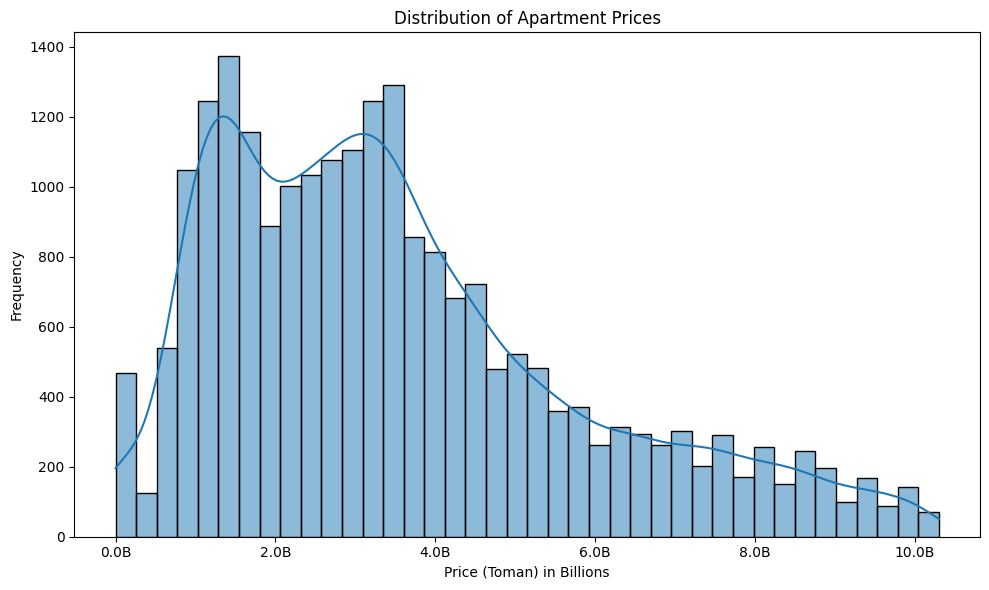

In [5]:
# --- 1. Price Distribution ---
plt.figure(figsize=(10, 6))
sns.histplot(df['Price(Toman)'], kde=True, bins=40)
plt.title('Distribution of Apartment Prices')
plt.xlabel('Price (Toman) in Billions')
plt.ylabel('Frequency')
# Format x-axis to be more readable (in billions)
formatter = lambda x, pos: f'{x/1e9:.1f}B'
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(formatter))
plt.tight_layout()
plt.show()

## Price vs. Area Chart
This chart confirms the strong and direct relationship between area and apartment price. The **`red line (regression line)`** clearly shows that as area increases, price predictably increases. The scatter of the points suggests that other factors also influence price, but **`area`** is one of the main ones.

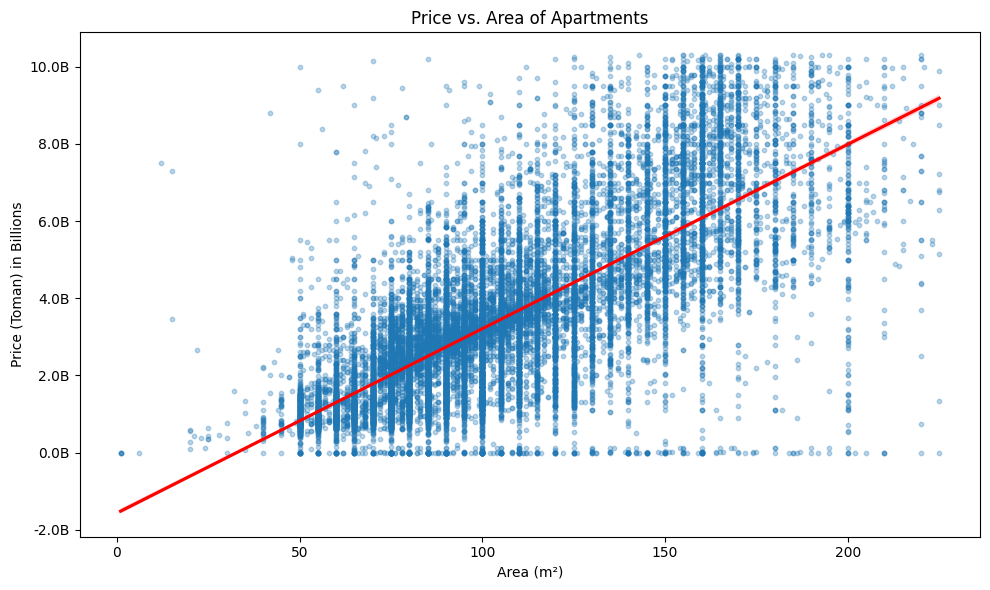

In [6]:
# --- 2. Price vs. Area ---
plt.figure(figsize=(10, 6))
sns.regplot(data=df, x='area', y='Price(Toman)', 
            scatter_kws={'alpha':0.3, 's':10}, 
            line_kws={'color': 'red'})
plt.title('Price vs. Area of Apartments')
plt.xlabel('Area (m²)')
plt.ylabel('Price (Toman) in Billions')
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(formatter))
plt.tight_layout()
plt.show()

## Most Expensive Neighborhoods
To avoid misleading results, this analysis was only conducted on neighborhoods that had at least **50** listings. The chart below shows the **`20 most expensive neighborhoods`** based on average price. Neighborhoods like ***`Sajjad, Hashemiyeh, and Koh Sangi`*** are at the top of the list. This chart is very useful for finding the most luxurious and expensive areas of the city.

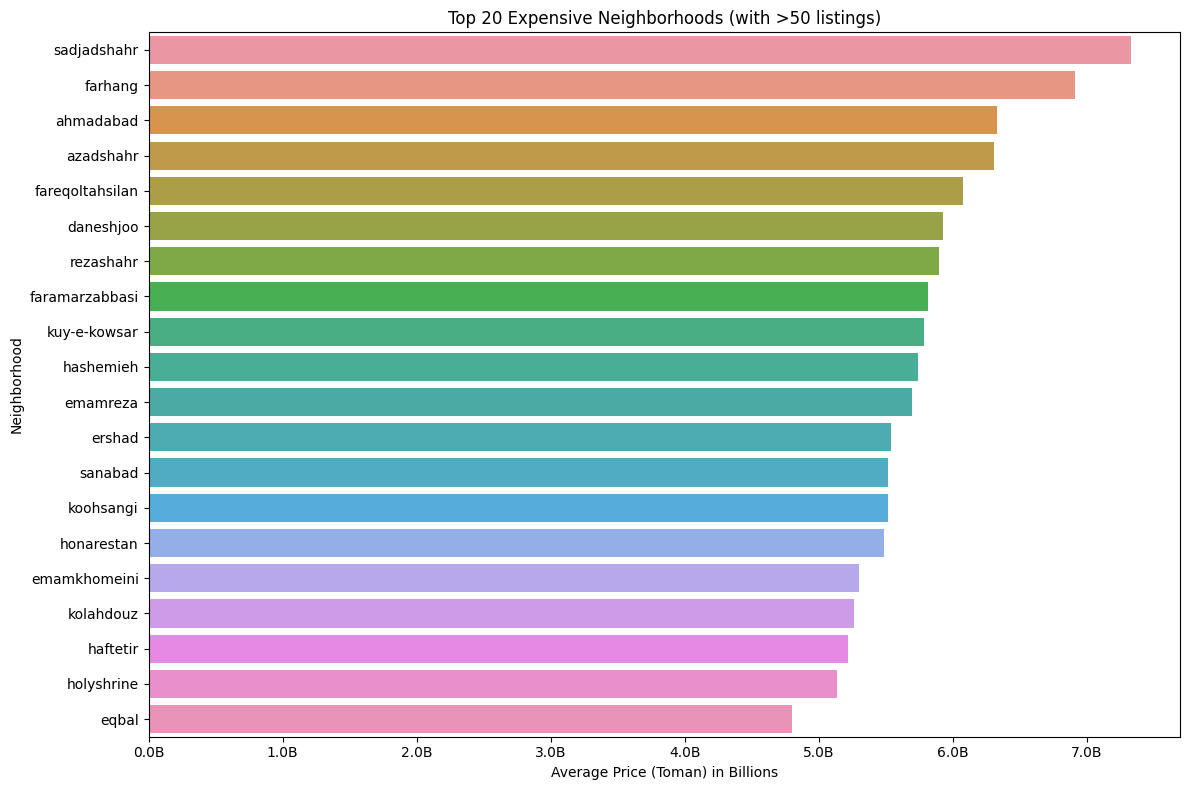

In [7]:
# --- 3. Price by Neighborhood ---
# Calculate mean price and count for each neighborhood
neighborhood_stats = df.groupby('neighborhood')['Price(Toman)'].agg(['mean', 'count'])
# Filter for neighborhoods with a significant number of listings (e.g., > 50)
min_listings = 50
significant_neighborhoods = neighborhood_stats[neighborhood_stats['count'] > min_listings]
# Select the top 20 by average price
top_20_neighborhoods = significant_neighborhoods.sort_values(by='mean', ascending=False).head(20)

plt.figure(figsize=(12, 8))
sns.barplot(y=top_20_neighborhoods.index, x=top_20_neighborhoods['mean'], orient='h')
plt.title(f'Top 20 Expensive Neighborhoods (with >{min_listings} listings)')
plt.xlabel('Average Price (Toman) in Billions')
plt.ylabel('Neighborhood')
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(formatter))
plt.tight_layout()
plt.show()

## The impact of number of bedrooms on price
The box plot below shows that as the number of bedrooms increases, the **`median price (the middle line of the box)`** also increases. **Two- and three-bedroom apartments** are significantly more **expensive** than one-bedroom or no-bedroom apartments. This chart confirms that the number of bedrooms is a key factor in property valuation.

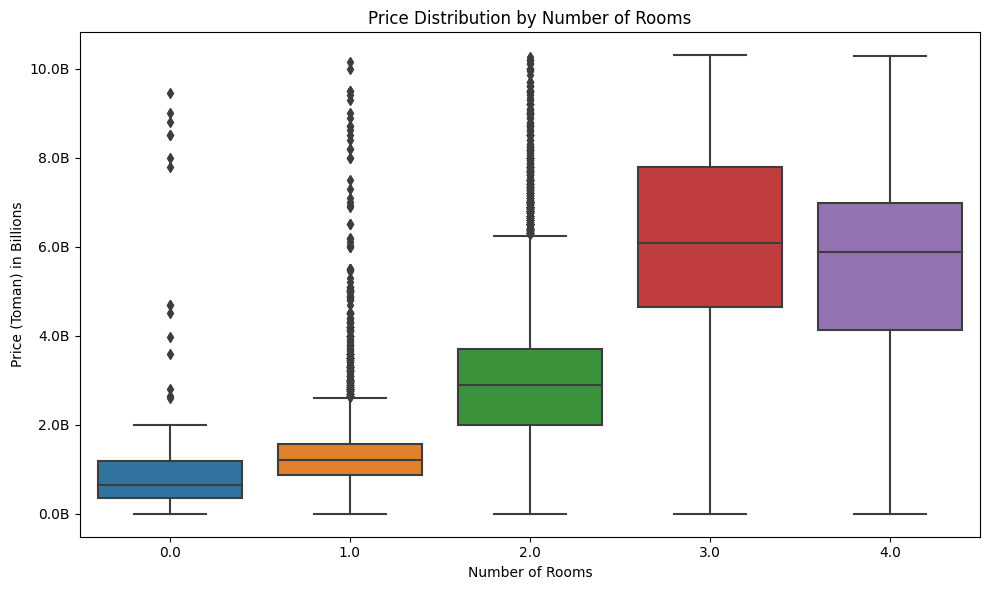

In [8]:
# --- 4. Price vs. Number of Rooms ---
plt.figure(figsize=(10, 6))
# Filter for common room counts (e.g., 0 to 4)
df_rooms = df[df['rooms_count'].isin([0, 1, 2, 3, 4])]
sns.boxplot(data=df_rooms, x='rooms_count', y='Price(Toman)')
plt.title('Price Distribution by Number of Rooms')
plt.xlabel('Number of Rooms')
plt.ylabel('Price (Toman) in Billions')
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(formatter))
plt.tight_layout()
plt.show()

## The impact of building age on price
This graph shows the density of apartments based on price and building age. The denser yellow dots indicate higher transaction frequency in that range. Two main conclusions can be drawn from this graph:

- The highest transaction density is for new buildings up to **10 years old.**

- In general, **newer (younger) apartments** have **higher prices**, and as the building age increases, the price gradually decreases.

/usr/local/lib/python3.11/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in greater_equal
  return op(a, b)


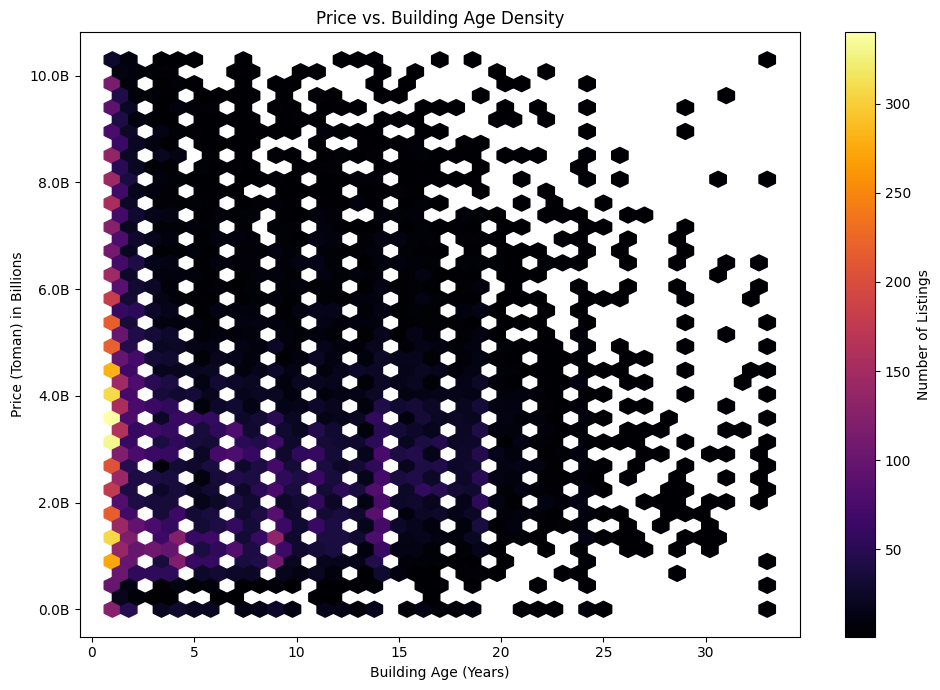

In [9]:
# --- 5. Price vs. Building Age ---
# Calculate building age. Current Shamsi year is 1404.
df['building_age'] = 1404 - df['construction_year']
# Remove any potential negative ages from bad data
df_age = df[df['building_age'] >= 0]

plt.figure(figsize=(10, 7))
# Using a 2D histogram (hexbin) for better visualization of density
plt.hexbin(data=df_age, x='building_age', y='Price(Toman)', gridsize=40, cmap='inferno', mincnt=1)
plt.colorbar(label='Number of Listings')
plt.title('Price vs. Building Age Density')
plt.xlabel('Building Age (Years)')
plt.ylabel('Price (Toman) in Billions')
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(formatter))
plt.tight_layout()
plt.show()

## The impact of amenities (elevator, parking, storage)
These three graphs clearly show the added value that amenities create for a property:

- **Elevator:** Apartments with an elevator are on average almost **`twice`** as expensive as apartments without an elevator.

- **Parking and storage:** The presence of parking and storage also has a significant positive effect on the average price of an apartment.

This analysis shows that the presence of these three amenities, especially **`the elevator`**, is a very important factor in determining the final price of the property.

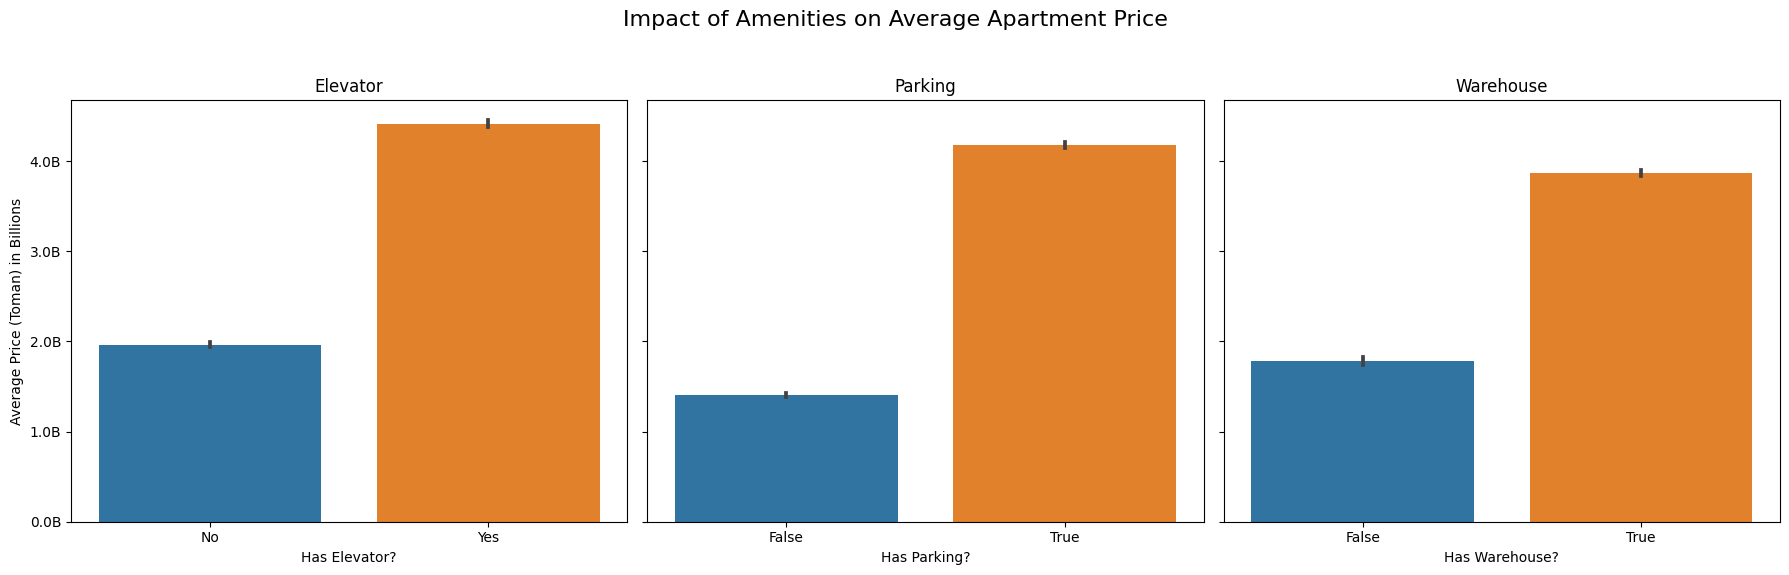

In [10]:
# --- 6. Impact of Amenities ---
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)
fig.suptitle('Impact of Amenities on Average Apartment Price', fontsize=16)

# has_elevator
sns.barplot(ax=axes[0], data=df, x='has_elevator', y='Price(Toman)')
axes[0].set_title('Elevator')
axes[0].set_xlabel('Has Elevator?')
axes[0].set_ylabel('Average Price (Toman) in Billions')
axes[0].set_xticklabels(['No', 'Yes'])
axes[0].yaxis.set_major_formatter(plt.FuncFormatter(formatter))

# has_parking
sns.barplot(ax=axes[1], data=df, x='has_parking', y='Price(Toman)')
axes[1].set_title('Parking')
axes[1].set_xlabel('Has Parking?')
axes[1].set_ylabel('')

# has_warehouse
sns.barplot(ax=axes[2], data=df, x='has_warehouse', y='Price(Toman)')
axes[2].set_title('Warehouse')
axes[2].set_xlabel('Has Warehouse?')
axes[2].set_ylabel('')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()